In [91]:
import pandas as pd 


pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', -1)
pd.set_option('mode.chained_assignment', None)

WORK_CUST = './AdvWorksCusts.csv'
AVE_SPEND = './AW_AveMonthSpend.csv'
BIKE_BUYER = './AW_BikeBuyer.csv'



### Import data


In [147]:
work_cust_df = pd.read_csv(WORK_CUST)
ave_spend_df = pd.read_csv(AVE_SPEND)
bike_buyer_df = pd.read_csv(BIKE_BUYER)

In [149]:
#Keep the last record for each unique customerID
work_cust_df = work_cust_df.drop_duplicates(subset='CustomerID', keep='last')
ave_spend_df = ave_spend_df.drop_duplicates(subset='CustomerID', keep='last')
bike_buyer_df = bike_buyer_df.drop_duplicates(subset='CustomerID',keep='last')

In [151]:
# Joing 3 dataframes into one DF
df = pd.merge(work_cust_df, ave_spend_df, left_on="CustomerID", right_on="CustomerID", how='left')
df = pd.merge(df, bike_buyer_df, left_on="CustomerID", right_on="CustomerID", how='left')

In [157]:
df.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95,1


In [163]:

keep_cols = ['CustomerID', 'BirthDate', 'Education', 'Occupation', 'HomeOwnerFlag', 'Gender', 'MaritalStatus', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer']

df2 = df[keep_cols]

In [165]:
df2.head()

,CustomerID,BirthDate,Education,Occupation,HomeOwnerFlag,Gender,MaritalStatus,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,1966-04-08,Bachelors,Professional,1,M,M,0,0,2,137947,89,0
1,11001,1965-05-14,Bachelors,Professional,0,M,S,1,3,3,101141,117,1
2,11002,1965-08-12,Bachelors,Professional,1,M,M,1,3,3,91945,123,0
3,11003,1968-02-15,Bachelors,Professional,0,F,S,1,0,0,86688,50,0
4,11004,1968-08-08,Bachelors,Professional,1,F,S,4,5,5,92771,95,1


### Work Sheet

In [166]:
df[['AveMonthSpend']].min()


AveMonthSpend    22
dtype: int64

In [167]:
df[['AveMonthSpend']].max()


AveMonthSpend    176
dtype: int64

In [162]:
df[['AveMonthSpend']].mean()
# aveMonthSpend

AveMonthSpend    72.391002
dtype: float64

In [168]:
df[['AveMonthSpend']].median()


AveMonthSpend    68.0
dtype: float64

In [169]:
df[['AveMonthSpend']].std()


AveMonthSpend    27.269921
dtype: float64

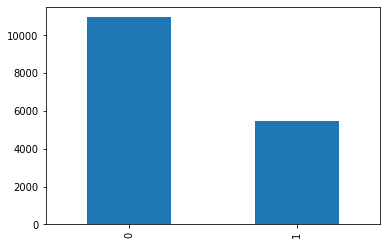

In [179]:
import matplotlib.pyplot as plt

%matplotlib inline

df.BikeBuyer.value_counts().plot(kind='bar')


In [183]:
df.groupby('Occupation').YearlyIncome.median().sort_values(ascending=False)

Occupation
Management        118781.0
Professional      99058.0 
Skilled Manual    66471.5 
Clerical          49481.0 
Manual            21722.0 
Name: YearlyIncome, dtype: float64

In [202]:
from datetime import datetime
from datetime import date


def calculate_age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    particular_date = datetime(1998, 1, 1)
    return particular_date.year - born.year - ((particular_date.month, particular_date.day) < (born.month, born.day))

def age_cat(age):
    if age < 25:
        return 'under_25'
    elif age >= 25 and age <= 45:
        
        return 'between_25_45'
    
    elif age > 45 and age <= 55:
        return 'between_44_55'
    
    elif age > 55:
        return 'over_55'


df['age'] = df['BirthDate'].apply(calculate_age)
df['age_cat'] = df['age'].apply(age_cat)




In [204]:
df.age_cat.value_counts()

between_25_45    10272
under_25         2932 
between_44_55    2305 
over_55          895  
Name: age_cat, dtype: int64

In [209]:
df.groupby(['age_cat', 'Gender']).AveMonthSpend.sum()

age_cat        Gender
between_25_45  F         302667
               M         485691
between_44_55  F         64905 
               M         103778
over_55        F         21371 
               M         30931 
under_25       F         70476 
               M         107683
Name: AveMonthSpend, dtype: int64

In [211]:
df.head(1)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,age,age_cat
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89,0,31,between_25_45


In [213]:
df.groupby(['MaritalStatus']).AveMonthSpend.median()

MaritalStatus
M    74
S    62
Name: AveMonthSpend, dtype: int64

In [215]:
df.groupby(['NumberCarsOwned']).AveMonthSpend.median()

NumberCarsOwned
0    65 
1    63 
2    64 
3    92 
4    100
Name: AveMonthSpend, dtype: int64

In [216]:
df.groupby(['Gender']).AveMonthSpend.median()

Gender
F    52
M    79
Name: AveMonthSpend, dtype: int64

In [219]:

range_male = df[df.Gender == 'M'].AveMonthSpend.max() - df[df.Gender == 'M'].AveMonthSpend.min()
range_fem = df[df.Gender == 'F'].AveMonthSpend.max() - df[df.Gender == 'F'].AveMonthSpend.min()


print('M', range_male)
print('F', range_fem)

M 147
F 92


In [221]:
df.groupby(['TotalChildren']).AveMonthSpend.median()

TotalChildren
0    56
1    61
2    66
3    73
4    83
5    97
Name: AveMonthSpend, dtype: int64

In [222]:
df.groupby(['BikeBuyer']).YearlyIncome.median()

BikeBuyer
0    65957
1    96084
Name: YearlyIncome, dtype: int64

In [225]:
def has_car(car_count):
    
    if car_count == 0:
        return 0
    else:
        return 1
    
    
df['has_car'] = df['NumberCarsOwned'].apply(has_car)

In [228]:
df.groupby(['BikeBuyer']).NumberCarsOwned.median()

BikeBuyer
0    1
1    2
Name: NumberCarsOwned, dtype: int64

In [229]:
df.groupby(['BikeBuyer']).Occupation.value_counts()

BikeBuyer  Occupation    
0          Skilled Manual    2903
           Professional      2738
           Clerical          1981
           Management        1702
           Manual            1625
1          Professional      2184
           Skilled Manual    1135
           Management        1016
           Clerical          616 
           Manual            504 
Name: Occupation, dtype: int64

In [230]:
df.groupby(['BikeBuyer']).Gender.value_counts()

BikeBuyer  Gender
0          F         5881
           M         5068
1          M         3222
           F         2233
Name: Gender, dtype: int64

In [233]:
df.groupby(['MaritalStatus']).BikeBuyer.sum()

MaritalStatus
M    2199
S    3256
Name: BikeBuyer, dtype: int64

In [234]:
df.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,age,age_cat,has_car
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89,0,31,between_25_45,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117,1,32,between_25_45,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123,0,32,between_25_45,1
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50,0,29,between_25_45,1
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95,1,29,between_25_45,1
